#### In this notebook, I have used Statistical central tendencies like (MEAN, MEDIAN,MODE) for imputation of the missing values of the ACTUAL_PAYMT_AMT and OCCUPATION_TYPE

### key observations:
#### 1. *Personal Loan and Business Loans have no collateral*
#### 2. *In most of the cases the actual_payment_amount was less than or equal to the emi_amount*

In [ ]:
import pandas as pd

## HANDLING MISSING VALUES

In [385]:
df=pd.read_csv('wrangled_data_main_test.csv')
pd.set_option('display.max_columns', None)
df.head(3)

,ID,ACCOUNT_TYPE,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,CURRENT_BALANCE,ACTUAL_PAYMT_AMT,EMI_AMOUNT,REPAYMENT_TENURE,LOAN_CLASSIFICATION,AMOUNT_OVERDUE,PAYMENT_HISTORY_1,OWNERSHIP_TYPE,COLLATERALVALUE,TU_SCORE,MONTH_PAYMENT_HISTORY_START,MONTH_PAYMENT_HISTORY_END,MONTH_CERTIFIED,MONTH_LAST_PAYMENT,AGE,OCCUPATION_TYPE,GENDER,COUNT_PAID,COUNT_LATE,COUNT_MORE_THAN_90,COUNT_0_TO_60,AVG_DAYS,COUNT_MISSING_DAYS
0,A000614177,Housing Loan,2277986,91,1824507,22985.0,NaN,149.0,0,NaN,0000000000000000000000000000000000000000000000...,Joint,3780000.0,780,0,36,0,0.0,35,SEP,Male,17.0,0.0,0.0,0.0,0.0,1.0
1,A001744326,Business Loan,1030000,14,819209,30256.0,NaN,NaN,0,NaN,0000000000000000000000000000000000000000000000...,Joint,NaN,774,0,15,0,0.0,47,NaN,Male,18.0,0.0,0.0,0.0,0.0,0.0
2,A000242802,Housing Loan,960705,3,908604,25229.0,NaN,NaN,0,NaN,0000000000000000000000000000000000000000000000...,Joint,2622010.0,809,0,4,0,0.0,59,SENP,Female,18.0,0.0,0.0,0.0,0.0,0.0


In [386]:
df.isna().sum()

ID                                      0
ACCOUNT_TYPE                            0
HIGH_CREDIT_OR_SANCTIONED_AMOUNT        0
MONTH_OPENED                            0
CURRENT_BALANCE                         0
ACTUAL_PAYMT_AMT                     1794
EMI_AMOUNT                          21445
REPAYMENT_TENURE                    15737
LOAN_CLASSIFICATION                     0
AMOUNT_OVERDUE                      25864
PAYMENT_HISTORY_1                       0
OWNERSHIP_TYPE                          0
COLLATERALVALUE                      9638
TU_SCORE                                0
MONTH_PAYMENT_HISTORY_START             0
MONTH_PAYMENT_HISTORY_END               0
MONTH_CERTIFIED                         0
MONTH_LAST_PAYMENT                   1406
AGE                                     0
OCCUPATION_TYPE                      8239
GENDER                                  0
COUNT_PAID                              0
COUNT_LATE                              0
COUNT_MORE_THAN_90                

### IMPUTING ACTUAL_PAYMT_AMT

In [387]:
import numpy as np

imputation_methods = [
    # ('Mean', lambda df, col: df[col].fillna(df[col].mean())),
    ('Median', lambda df, col: df[col].fillna(df[col].median())),
    # ('Zero', lambda df, col: df[col].fillna(0)),
    # ('Forward Fill', lambda df, col: df[col].fillna(method='ffill')),
    # ('Backward Fill', lambda df, col: df[col].fillna(method='bfill')),
    # ('Linear Interpolation', lambda df, col: df[col].interpolate(method='linear'))
]

# Column to apply imputation
column_to_impute = 'ACTUAL_PAYMT_AMT'

# Iterate through imputation methods and apply to the main DataFrame (df)
for method_name, method_func in imputation_methods:
    df[column_to_impute] = method_func(df, column_to_impute)
    
    # Print or visualize the results, or perform further analysis
    print(f"Imputation method: {method_name}")
    # You can print or visualize the DataFrame df and analyze the impact of the imputation
    
    # Example: Checking the number of missing values after imputation
    print(f"Missing values after imputation: {df[column_to_impute].isnull().sum()}")
    print("="*50)


Imputation method: Median
Missing values after imputation: 0


In [388]:
df.head(40)

,ID,ACCOUNT_TYPE,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,CURRENT_BALANCE,ACTUAL_PAYMT_AMT,EMI_AMOUNT,REPAYMENT_TENURE,LOAN_CLASSIFICATION,AMOUNT_OVERDUE,PAYMENT_HISTORY_1,OWNERSHIP_TYPE,COLLATERALVALUE,TU_SCORE,MONTH_PAYMENT_HISTORY_START,MONTH_PAYMENT_HISTORY_END,MONTH_CERTIFIED,MONTH_LAST_PAYMENT,AGE,OCCUPATION_TYPE,GENDER,COUNT_PAID,COUNT_LATE,COUNT_MORE_THAN_90,COUNT_0_TO_60,AVG_DAYS,COUNT_MISSING_DAYS
0,A000614177,Housing Loan,2277986,91,1824507,22985.0,NaN,149.0,0,NaN,0000000000000000000000000000000000000000000000...,Joint,3780000.0,780,0,36,0,0.0,35,SEP,Male,17.0,0.0,0.0,0.0,0.000000,1.0
1,A001744326,Business Loan,1030000,14,819209,30256.0,NaN,NaN,0,NaN,0000000000000000000000000000000000000000000000...,Joint,NaN,774,0,15,0,0.0,47,NaN,Male,18.0,0.0,0.0,0.0,0.000000,0.0
2,A000242802,Housing Loan,960705,3,908604,25229.0,NaN,NaN,0,NaN,0000000000000000000000000000000000000000000000...,Joint,2622010.0,809,0,4,0,0.0,59,SENP,Female,18.0,0.0,0.0,0.0,0.000000,0.0
3,B1000244547,Housing Loan,1437990,69,1367609,13067.0,NaN,259.0,0,NaN,0000000000000000000000000000000000000000000000...,Joint,2947100.0,759,0,36,0,0.0,54,SENP,Male,17.0,0.0,0.0,0.0,0.000000,1.0
4,B3000178046,Business Loan,728474,1,718224,22350.0,21778.0,NaN,0,NaN,0000000000000000000000000000000000000000000000...,Joint,NaN,731,0,2,0,0.0,50,SENP,Male,18.0,0.0,0.0,0.0,0.000000,0.0
5,A000603532,Housing Loan,2538563,66,2622242,10472.0,23715.0,345.0,900,821868.0,9009009009009009009008728428117837527216916606...,Joint,2951130.0,690,0,36,0,17.0,37,SENP,Male,0.0,17.0,17.0,0.0,801.823529,1.0
6,A001007394,Housing Loan,892792,68,485021,5222.0,NaN,192.0,0,NaN,0000000000000000000000000000000000000000000000...,Joint,995011.0,769,0,36,0,0.0,39,SALARIED,Male,17.0,0.0,0.0,0.0,0.000000,1.0
7,A002373498,Property Loan,1664124,6,1650725,22724.0,NaN,NaN,0,NaN,0000000000000000000000000000000000000000000000...,Joint,3240000.0,758,0,7,0,0.0,27,OTHERS,Female,18.0,0.0,0.0,0.0,0.000000,0.0
8,A002464045,Housing Loan,3974109,10,3940514,39677.0,NaN,NaN,0,NaN,0000000000000000000000000000000000000000000000...,Joint,8877000.0,772,0,10,0,0.0,45,SENP,Female,18.0,0.0,0.0,0.0,0.000000,0.0
9,A002183825,Housing Loan,2814916,12,2779514,27165.0,27165.0,NaN,0,NaN,0000000000000000000000000000000000000000000000...,Joint,3730797.0,803,0,13,0,0.0,39,NaN,Male,18.0,0.0,0.0,0.0,0.000000,0.0


### IMPUTING REPAYMENT TENURE
#### Strategy-1

In [389]:
# Impute 'REPAYMENT_TENURE' with median based on 'ACCOUNT_TYPE'
df['REPAYMENT_TENURE'] = df.groupby('ACCOUNT_TYPE')['REPAYMENT_TENURE'].transform(lambda x: x.fillna(x.median()))

# Print or visualize the results, or perform further analysis
print("Imputation method: Median based on ACCOUNT_TYPE")
# You can print or visualize the DataFrame df and analyze the impact of the imputation

# Example: Checking the number of missing values after imputation
print(f"Missing values after imputation: {df['REPAYMENT_TENURE'].isnull().sum()}")
print("="*50)


Imputation method: Median based on ACCOUNT_TYPE
Missing values after imputation: 0


In [390]:
df.head(40)

,ID,ACCOUNT_TYPE,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,CURRENT_BALANCE,ACTUAL_PAYMT_AMT,EMI_AMOUNT,REPAYMENT_TENURE,LOAN_CLASSIFICATION,AMOUNT_OVERDUE,PAYMENT_HISTORY_1,OWNERSHIP_TYPE,COLLATERALVALUE,TU_SCORE,MONTH_PAYMENT_HISTORY_START,MONTH_PAYMENT_HISTORY_END,MONTH_CERTIFIED,MONTH_LAST_PAYMENT,AGE,OCCUPATION_TYPE,GENDER,COUNT_PAID,COUNT_LATE,COUNT_MORE_THAN_90,COUNT_0_TO_60,AVG_DAYS,COUNT_MISSING_DAYS
0,A000614177,Housing Loan,2277986,91,1824507,22985.0,NaN,149.0,0,NaN,0000000000000000000000000000000000000000000000...,Joint,3780000.0,780,0,36,0,0.0,35,SEP,Male,17.0,0.0,0.0,0.0,0.000000,1.0
1,A001744326,Business Loan,1030000,14,819209,30256.0,NaN,48.0,0,NaN,0000000000000000000000000000000000000000000000...,Joint,NaN,774,0,15,0,0.0,47,NaN,Male,18.0,0.0,0.0,0.0,0.000000,0.0
2,A000242802,Housing Loan,960705,3,908604,25229.0,NaN,175.0,0,NaN,0000000000000000000000000000000000000000000000...,Joint,2622010.0,809,0,4,0,0.0,59,SENP,Female,18.0,0.0,0.0,0.0,0.000000,0.0
3,B1000244547,Housing Loan,1437990,69,1367609,13067.0,NaN,259.0,0,NaN,0000000000000000000000000000000000000000000000...,Joint,2947100.0,759,0,36,0,0.0,54,SENP,Male,17.0,0.0,0.0,0.0,0.000000,1.0
4,B3000178046,Business Loan,728474,1,718224,22350.0,21778.0,48.0,0,NaN,0000000000000000000000000000000000000000000000...,Joint,NaN,731,0,2,0,0.0,50,SENP,Male,18.0,0.0,0.0,0.0,0.000000,0.0
5,A000603532,Housing Loan,2538563,66,2622242,10472.0,23715.0,345.0,900,821868.0,9009009009009009009008728428117837527216916606...,Joint,2951130.0,690,0,36,0,17.0,37,SENP,Male,0.0,17.0,17.0,0.0,801.823529,1.0
6,A001007394,Housing Loan,892792,68,485021,5222.0,NaN,192.0,0,NaN,0000000000000000000000000000000000000000000000...,Joint,995011.0,769,0,36,0,0.0,39,SALARIED,Male,17.0,0.0,0.0,0.0,0.000000,1.0
7,A002373498,Property Loan,1664124,6,1650725,22724.0,NaN,142.0,0,NaN,0000000000000000000000000000000000000000000000...,Joint,3240000.0,758,0,7,0,0.0,27,OTHERS,Female,18.0,0.0,0.0,0.0,0.000000,0.0
8,A002464045,Housing Loan,3974109,10,3940514,39677.0,NaN,175.0,0,NaN,0000000000000000000000000000000000000000000000...,Joint,8877000.0,772,0,10,0,0.0,45,SENP,Female,18.0,0.0,0.0,0.0,0.000000,0.0
9,A002183825,Housing Loan,2814916,12,2779514,27165.0,27165.0,175.0,0,NaN,0000000000000000000000000000000000000000000000...,Joint,3730797.0,803,0,13,0,0.0,39,NaN,Male,18.0,0.0,0.0,0.0,0.000000,0.0


### IMPUTATION OF EMI AMOUNT USING KNN IMPUTER (FAILED)

In [391]:
# import pandas as pd
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error
# from sklearn.ensemble import RandomForestRegressor  # You can choose a different regressor based on your problem

# # Assuming you have a DataFrame 'df' with columns: CURRENT_BALANCE, ACTUAL_PAYMT_AMT, REPAYMENT_TENURE, AMOUNT_OVERDUE, ACCOUNT_TYPE, EMI_AMOUNT
# # df is your original DataFrame, and you want to work with a copy df_copy
# df_copy = df.copy()

# # Filter rows with non-missing values for the target variable 'EMI_AMOUNT'
# df_copy = df_copy[df_copy['EMI_AMOUNT'].notna()]

# # Separate features and target variable in the copied DataFrame
# X_copy = df_copy[['CURRENT_BALANCE', 'ACTUAL_PAYMT_AMT', 'REPAYMENT_TENURE', 'ACCOUNT_TYPE']]
# y_copy = df_copy['EMI_AMOUNT']

# # Split the copied dataset into training and testing sets
# X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X_copy, y_copy, test_size=0.2, random_state=42)

# # Apply feature scaling to numerical columns in the copied DataFrame
# scaler_copy = StandardScaler()
# X_train_scaled_copy = scaler_copy.fit_transform(X_train_copy[['CURRENT_BALANCE', 'ACTUAL_PAYMT_AMT', 'REPAYMENT_TENURE']])
# X_test_scaled_copy = scaler_copy.transform(X_test_copy[['CURRENT_BALANCE', 'ACTUAL_PAYMT_AMT', 'REPAYMENT_TENURE']])

# # Initialize KNNImputer for the copied DataFrame
# imputer_copy = KNNImputer(n_neighbors=5)

# # Fit and transform the scaled training set in the copied DataFrame
# X_train_imputed_copy = imputer_copy.fit_transform(X_train_scaled_copy)

# # Transform the scaled test set in the copied DataFrame
# X_test_imputed_copy = imputer_copy.transform(X_test_scaled_copy)

# # Train a regressor on the imputed training data in the copied DataFrame
# regressor_copy = RandomForestRegressor()  # You can choose a different regressor
# regressor_copy.fit(X_train_imputed_copy, y_train_copy)

# # Predict on the imputed test data in the copied DataFrame
# y_pred_copy = regressor_copy.predict(X_test_imputed_copy)

# # Evaluate the model in the copied DataFrame
# mse_copy = mean_squared_error(y_test_copy, y_pred_copy)
# print(f'Mean Squared Error on the copied DataFrame: {mse_copy}')


### JUST DROPPING FOR NOW (EMI_AMOUNT)

In [392]:
df = df.drop('EMI_AMOUNT', axis=1)

In [393]:
df.isna().sum()

ID                                      0
ACCOUNT_TYPE                            0
HIGH_CREDIT_OR_SANCTIONED_AMOUNT        0
MONTH_OPENED                            0
CURRENT_BALANCE                         0
ACTUAL_PAYMT_AMT                        0
REPAYMENT_TENURE                        0
LOAN_CLASSIFICATION                     0
AMOUNT_OVERDUE                      25864
PAYMENT_HISTORY_1                       0
OWNERSHIP_TYPE                          0
COLLATERALVALUE                      9638
TU_SCORE                                0
MONTH_PAYMENT_HISTORY_START             0
MONTH_PAYMENT_HISTORY_END               0
MONTH_CERTIFIED                         0
MONTH_LAST_PAYMENT                   1406
AGE                                     0
OCCUPATION_TYPE                      8239
GENDER                                  0
COUNT_PAID                              0
COUNT_LATE                              0
COUNT_MORE_THAN_90                      0
COUNT_0_TO_60                     

In [394]:
df = df.drop('LOAN_CLASSIFICATION', axis=1)

In [395]:
df['AMOUNT_OVERDUE'] = df['AMOUNT_OVERDUE'].fillna(0)

In [396]:
df['MONTH_LAST_PAYMENT'].fillna(0, inplace=True)
df['COLLATERALVALUE'].fillna(0, inplace=True)

In [397]:
df.isna().sum()


ID                                     0
ACCOUNT_TYPE                           0
HIGH_CREDIT_OR_SANCTIONED_AMOUNT       0
MONTH_OPENED                           0
CURRENT_BALANCE                        0
ACTUAL_PAYMT_AMT                       0
REPAYMENT_TENURE                       0
AMOUNT_OVERDUE                         0
PAYMENT_HISTORY_1                      0
OWNERSHIP_TYPE                         0
COLLATERALVALUE                        0
TU_SCORE                               0
MONTH_PAYMENT_HISTORY_START            0
MONTH_PAYMENT_HISTORY_END              0
MONTH_CERTIFIED                        0
MONTH_LAST_PAYMENT                     0
AGE                                    0
OCCUPATION_TYPE                     8239
GENDER                                 0
COUNT_PAID                             0
COUNT_LATE                             0
COUNT_MORE_THAN_90                     0
COUNT_0_TO_60                          0
AVG_DAYS                               0
COUNT_MISSING_DA

In [398]:
df.head(40)

,ID,ACCOUNT_TYPE,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,CURRENT_BALANCE,ACTUAL_PAYMT_AMT,REPAYMENT_TENURE,AMOUNT_OVERDUE,PAYMENT_HISTORY_1,OWNERSHIP_TYPE,COLLATERALVALUE,TU_SCORE,MONTH_PAYMENT_HISTORY_START,MONTH_PAYMENT_HISTORY_END,MONTH_CERTIFIED,MONTH_LAST_PAYMENT,AGE,OCCUPATION_TYPE,GENDER,COUNT_PAID,COUNT_LATE,COUNT_MORE_THAN_90,COUNT_0_TO_60,AVG_DAYS,COUNT_MISSING_DAYS
0,A000614177,Housing Loan,2277986,91,1824507,22985.0,149.0,0.0,0000000000000000000000000000000000000000000000...,Joint,3780000.0,780,0,36,0,0.0,35,SEP,Male,17.0,0.0,0.0,0.0,0.000000,1.0
1,A001744326,Business Loan,1030000,14,819209,30256.0,48.0,0.0,0000000000000000000000000000000000000000000000...,Joint,0.0,774,0,15,0,0.0,47,NaN,Male,18.0,0.0,0.0,0.0,0.000000,0.0
2,A000242802,Housing Loan,960705,3,908604,25229.0,175.0,0.0,0000000000000000000000000000000000000000000000...,Joint,2622010.0,809,0,4,0,0.0,59,SENP,Female,18.0,0.0,0.0,0.0,0.000000,0.0
3,B1000244547,Housing Loan,1437990,69,1367609,13067.0,259.0,0.0,0000000000000000000000000000000000000000000000...,Joint,2947100.0,759,0,36,0,0.0,54,SENP,Male,17.0,0.0,0.0,0.0,0.000000,1.0
4,B3000178046,Business Loan,728474,1,718224,22350.0,48.0,0.0,0000000000000000000000000000000000000000000000...,Joint,0.0,731,0,2,0,0.0,50,SENP,Male,18.0,0.0,0.0,0.0,0.000000,0.0
5,A000603532,Housing Loan,2538563,66,2622242,10472.0,345.0,821868.0,9009009009009009009008728428117837527216916606...,Joint,2951130.0,690,0,36,0,17.0,37,SENP,Male,0.0,17.0,17.0,0.0,801.823529,1.0
6,A001007394,Housing Loan,892792,68,485021,5222.0,192.0,0.0,0000000000000000000000000000000000000000000000...,Joint,995011.0,769,0,36,0,0.0,39,SALARIED,Male,17.0,0.0,0.0,0.0,0.000000,1.0
7,A002373498,Property Loan,1664124,6,1650725,22724.0,142.0,0.0,0000000000000000000000000000000000000000000000...,Joint,3240000.0,758,0,7,0,0.0,27,OTHERS,Female,18.0,0.0,0.0,0.0,0.000000,0.0
8,A002464045,Housing Loan,3974109,10,3940514,39677.0,175.0,0.0,0000000000000000000000000000000000000000000000...,Joint,8877000.0,772,0,10,0,0.0,45,SENP,Female,18.0,0.0,0.0,0.0,0.000000,0.0
9,A002183825,Housing Loan,2814916,12,2779514,27165.0,175.0,0.0,0000000000000000000000000000000000000000000000...,Joint,3730797.0,803,0,13,0,0.0,39,NaN,Male,18.0,0.0,0.0,0.0,0.000000,0.0


In [399]:
import pandas as pd

# Assuming you have a DataFrame named 'df' and 'OCCUPATION_TYPE' is the column of interest
occupation_counts = df['OCCUPATION_TYPE'].value_counts()

print("Number of occurrences for each label in OCCUPATION_TYPE:")
print(occupation_counts)


Number of occurrences for each label in OCCUPATION_TYPE:
OCCUPATION_TYPE
SALARIED    12415
SENP         5064
OTHERS       2214
SEP          2050
Salaried        1
Name: count, dtype: int64


In [400]:
# import pandas as pd

# # Assuming you have a DataFrame named 'df' with 'OCCUPATION_TYPE' and 'ROI' columns
# average_roi_by_occupation = df.groupby('OCCUPATION_TYPE')['ACTUAL_ROI'].mean()
# print("Average ROI for each label in OCCUPATION_TYPE:")
# print(average_roi_by_occupation)

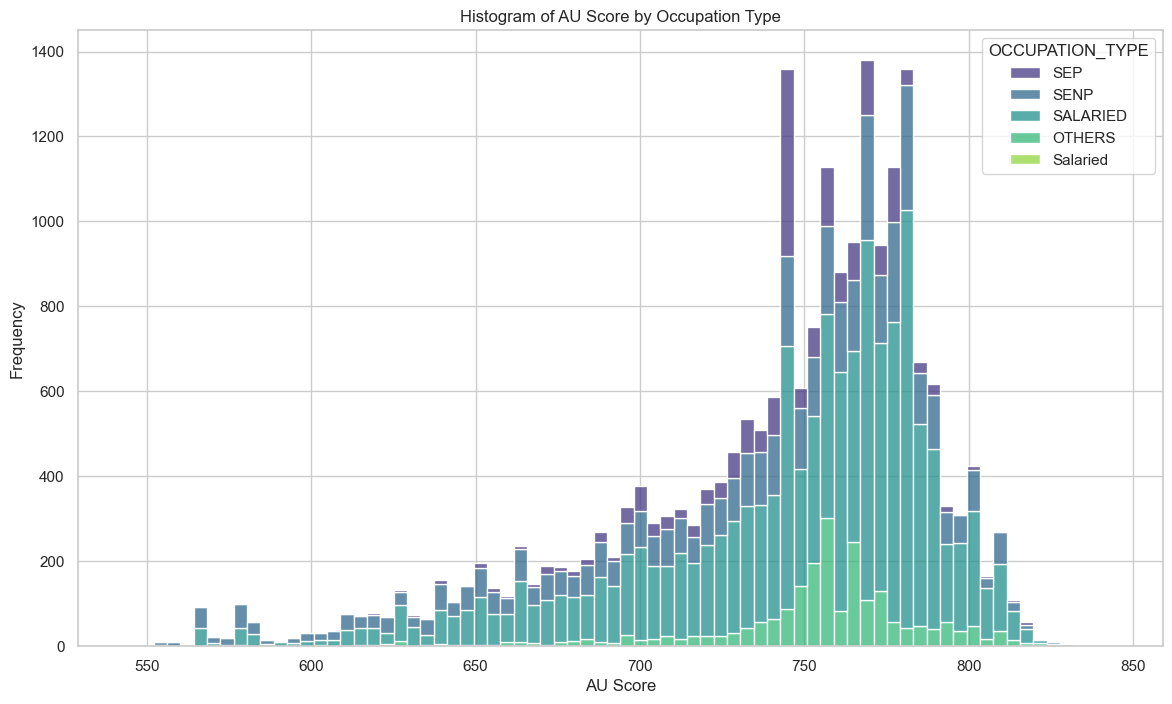

In [401]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'AU_SCORE' and 'OCCUPATION_TYPE' columns
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='TU_SCORE', hue='OCCUPATION_TYPE', multiple='stack', palette='viridis', kde=False)
plt.title('Histogram of AU Score by Occupation Type')
plt.xlabel('AU Score')
plt.ylabel('Frequency')
plt.show()


In [402]:
df.head(40)

,ID,ACCOUNT_TYPE,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,CURRENT_BALANCE,ACTUAL_PAYMT_AMT,REPAYMENT_TENURE,AMOUNT_OVERDUE,PAYMENT_HISTORY_1,OWNERSHIP_TYPE,COLLATERALVALUE,TU_SCORE,MONTH_PAYMENT_HISTORY_START,MONTH_PAYMENT_HISTORY_END,MONTH_CERTIFIED,MONTH_LAST_PAYMENT,AGE,OCCUPATION_TYPE,GENDER,COUNT_PAID,COUNT_LATE,COUNT_MORE_THAN_90,COUNT_0_TO_60,AVG_DAYS,COUNT_MISSING_DAYS
0,A000614177,Housing Loan,2277986,91,1824507,22985.0,149.0,0.0,0000000000000000000000000000000000000000000000...,Joint,3780000.0,780,0,36,0,0.0,35,SEP,Male,17.0,0.0,0.0,0.0,0.000000,1.0
1,A001744326,Business Loan,1030000,14,819209,30256.0,48.0,0.0,0000000000000000000000000000000000000000000000...,Joint,0.0,774,0,15,0,0.0,47,NaN,Male,18.0,0.0,0.0,0.0,0.000000,0.0
2,A000242802,Housing Loan,960705,3,908604,25229.0,175.0,0.0,0000000000000000000000000000000000000000000000...,Joint,2622010.0,809,0,4,0,0.0,59,SENP,Female,18.0,0.0,0.0,0.0,0.000000,0.0
3,B1000244547,Housing Loan,1437990,69,1367609,13067.0,259.0,0.0,0000000000000000000000000000000000000000000000...,Joint,2947100.0,759,0,36,0,0.0,54,SENP,Male,17.0,0.0,0.0,0.0,0.000000,1.0
4,B3000178046,Business Loan,728474,1,718224,22350.0,48.0,0.0,0000000000000000000000000000000000000000000000...,Joint,0.0,731,0,2,0,0.0,50,SENP,Male,18.0,0.0,0.0,0.0,0.000000,0.0
5,A000603532,Housing Loan,2538563,66,2622242,10472.0,345.0,821868.0,9009009009009009009008728428117837527216916606...,Joint,2951130.0,690,0,36,0,17.0,37,SENP,Male,0.0,17.0,17.0,0.0,801.823529,1.0
6,A001007394,Housing Loan,892792,68,485021,5222.0,192.0,0.0,0000000000000000000000000000000000000000000000...,Joint,995011.0,769,0,36,0,0.0,39,SALARIED,Male,17.0,0.0,0.0,0.0,0.000000,1.0
7,A002373498,Property Loan,1664124,6,1650725,22724.0,142.0,0.0,0000000000000000000000000000000000000000000000...,Joint,3240000.0,758,0,7,0,0.0,27,OTHERS,Female,18.0,0.0,0.0,0.0,0.000000,0.0
8,A002464045,Housing Loan,3974109,10,3940514,39677.0,175.0,0.0,0000000000000000000000000000000000000000000000...,Joint,8877000.0,772,0,10,0,0.0,45,SENP,Female,18.0,0.0,0.0,0.0,0.000000,0.0
9,A002183825,Housing Loan,2814916,12,2779514,27165.0,175.0,0.0,0000000000000000000000000000000000000000000000...,Joint,3730797.0,803,0,13,0,0.0,39,NaN,Male,18.0,0.0,0.0,0.0,0.000000,0.0


In [403]:
df.isna().sum()

ID                                     0
ACCOUNT_TYPE                           0
HIGH_CREDIT_OR_SANCTIONED_AMOUNT       0
MONTH_OPENED                           0
CURRENT_BALANCE                        0
ACTUAL_PAYMT_AMT                       0
REPAYMENT_TENURE                       0
AMOUNT_OVERDUE                         0
PAYMENT_HISTORY_1                      0
OWNERSHIP_TYPE                         0
COLLATERALVALUE                        0
TU_SCORE                               0
MONTH_PAYMENT_HISTORY_START            0
MONTH_PAYMENT_HISTORY_END              0
MONTH_CERTIFIED                        0
MONTH_LAST_PAYMENT                     0
AGE                                    0
OCCUPATION_TYPE                     8239
GENDER                                 0
COUNT_PAID                             0
COUNT_LATE                             0
COUNT_MORE_THAN_90                     0
COUNT_0_TO_60                          0
AVG_DAYS                               0
COUNT_MISSING_DA

In [404]:
df = df[df['OCCUPATION_TYPE'] != 'R18']


In [405]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming you have a DataFrame named 'df' with 'TU_SCORE', 'ACTUAL_ROI', 'OCCUPATION_TYPE', and 'ACCOUNT_TYPE' columns
# Drop rows with NaN values in 'TU_SCORE' or 'ACTUAL_ROI'
df_cleaned = df.dropna(subset=['OCCUPATION_TYPE'])

# Separate features and target variable
X = df_cleaned[['TU_SCORE', 'HIGH_CREDIT_OR_SANCTIONED_AMOUNT', 'COLLATERALVALUE', 'ACTUAL_PAYMT_AMT', 'REPAYMENT_TENURE', 'AGE', 'ACCOUNT_TYPE','GENDER','AVG_DAYS','COUNT_PAID','COUNT_LATE','MONTH_OPENED','CURRENT_BALANCE']]
y = df_cleaned['OCCUPATION_TYPE']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-Hot Encode the 'ACCOUNT_TYPE' column
X_encoded = pd.get_dummies(X, columns=['ACCOUNT_TYPE','GENDER'], drop_first=True)

# Split the data into a separate test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.1, random_state=42)

# Initialize and train the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Get unique classes in the target variable
unique_classes = label_encoder.classes_

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred, labels=range(len(unique_classes)), target_names=unique_classes)

print("Test Set:")
print(f"Accuracy: {test_accuracy:.2f}")
print("Classification Report:")
print(test_classification_rep)
print("-" * 50)


Test Set:
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

      OTHERS       0.65      0.71      0.68       223
    SALARIED       0.75      0.87      0.81      1272
        SENP       0.60      0.40      0.48       494
         SEP       0.73      0.53      0.61       186
    Salaried       0.00      0.00      0.00         0

   micro avg       0.72      0.72      0.72      2175
   macro avg       0.55      0.50      0.52      2175
weighted avg       0.71      0.72      0.70      2175

--------------------------------------------------


c:\Users\risha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\risha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\risha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

In [406]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming you have a DataFrame named 'df' with 'TU_SCORE', 'ACTUAL_ROI', 'OCCUPATION_TYPE', and 'ACCOUNT_TYPE' columns
# Drop rows with NaN values in 'TU_SCORE' or 'ACTUAL_ROI'
df_cleaned = df.dropna(subset=['OCCUPATION_TYPE'])

# Separate features and target variable for non-missing rows
X_train = df_cleaned[['TU_SCORE', 'HIGH_CREDIT_OR_SANCTIONED_AMOUNT', 'COLLATERALVALUE', 'ACTUAL_PAYMT_AMT', 'REPAYMENT_TENURE', 'AGE', 'ACCOUNT_TYPE']]
y_train = df_cleaned['OCCUPATION_TYPE']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# One-Hot Encode the 'ACCOUNT_TYPE' column
X_train_encoded = pd.get_dummies(X_train, columns=['ACCOUNT_TYPE'], drop_first=True)

# Initialize and train the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_encoded, y_train_encoded)

# Select rows with missing values in 'OCCUPATION_TYPE'
missing_rows = df[df['OCCUPATION_TYPE'].isnull()]

# Separate features for missing rows
X_missing = missing_rows[['TU_SCORE', 'HIGH_CREDIT_OR_SANCTIONED_AMOUNT', 'COLLATERALVALUE', 'ACTUAL_PAYMT_AMT', 'REPAYMENT_TENURE', 'AGE', 'ACCOUNT_TYPE']]

# One-Hot Encode the 'ACCOUNT_TYPE' column for missing rows
X_missing_encoded = pd.get_dummies(X_missing, columns=['ACCOUNT_TYPE'], drop_first=True)

# Predict the missing values using the trained model
predicted_values = model.predict(X_missing_encoded)

# Decode the predicted values to the original labels
predicted_labels = label_encoder.inverse_transform(predicted_values)

# Impute the predicted values back to the original DataFrame
df.loc[df['OCCUPATION_TYPE'].isnull(), 'OCCUPATION_TYPE'] = predicted_labels

# Now, 'OCCUPATION_TYPE' column should be imputed for missing values


## NO PATTERN DETECTED IN THE TIME SERIES 

In [407]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming you have a DataFrame named 'df' with 'MONTH_OPENED', 'REPAYMENT_TENURE', and 'ACCOUNT_TYPE' columns
# # Sort the DataFrame by 'MONTH_OPENED' for a chronological plot
# df.sort_values(by='MONTH_OPENED', inplace=True)

# # Convert 'MONTH_OPENED' to years
# df['YEARS_OPENED'] = df['MONTH_OPENED'] / 12

# # Get unique 'ACCOUNT_TYPE' values
# account_types = df['ACCOUNT_TYPE'].unique()

# # Plotting the time series of 'REPAYMENT_TENURE' against 'YEARS_OPENED' for each 'ACCOUNT_TYPE'
# plt.figure(figsize=(12, 6))

# for account_type in account_types:
#     subset_df = df[df['ACCOUNT_TYPE'] == account_type]
#     plt.plot(subset_df['YEARS_OPENED'], subset_df['REPAYMENT_TENURE'], marker='o', linestyle='-', label=account_type)

# plt.title('Time Series Plot of Repayment Tenure')
# plt.xlabel('Years Opened (Number of years back from current date)')
# plt.ylabel('Repayment Tenure')
# plt.legend()
# plt.grid(True)

# # Set left and right limits on the x-axis
# plt.xlim(left=30 / 12, right=60 / 12)

# plt.show()


In [408]:
df.head(40)

,ID,ACCOUNT_TYPE,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,CURRENT_BALANCE,ACTUAL_PAYMT_AMT,REPAYMENT_TENURE,AMOUNT_OVERDUE,PAYMENT_HISTORY_1,OWNERSHIP_TYPE,COLLATERALVALUE,TU_SCORE,MONTH_PAYMENT_HISTORY_START,MONTH_PAYMENT_HISTORY_END,MONTH_CERTIFIED,MONTH_LAST_PAYMENT,AGE,OCCUPATION_TYPE,GENDER,COUNT_PAID,COUNT_LATE,COUNT_MORE_THAN_90,COUNT_0_TO_60,AVG_DAYS,COUNT_MISSING_DAYS
0,A000614177,Housing Loan,2277986,91,1824507,22985.0,149.0,0.0,0000000000000000000000000000000000000000000000...,Joint,3780000.0,780,0,36,0,0.0,35,SEP,Male,17.0,0.0,0.0,0.0,0.000000,1.0
1,A001744326,Business Loan,1030000,14,819209,30256.0,48.0,0.0,0000000000000000000000000000000000000000000000...,Joint,0.0,774,0,15,0,0.0,47,SENP,Male,18.0,0.0,0.0,0.0,0.000000,0.0
2,A000242802,Housing Loan,960705,3,908604,25229.0,175.0,0.0,0000000000000000000000000000000000000000000000...,Joint,2622010.0,809,0,4,0,0.0,59,SENP,Female,18.0,0.0,0.0,0.0,0.000000,0.0
3,B1000244547,Housing Loan,1437990,69,1367609,13067.0,259.0,0.0,0000000000000000000000000000000000000000000000...,Joint,2947100.0,759,0,36,0,0.0,54,SENP,Male,17.0,0.0,0.0,0.0,0.000000,1.0
4,B3000178046,Business Loan,728474,1,718224,22350.0,48.0,0.0,0000000000000000000000000000000000000000000000...,Joint,0.0,731,0,2,0,0.0,50,SENP,Male,18.0,0.0,0.0,0.0,0.000000,0.0
5,A000603532,Housing Loan,2538563,66,2622242,10472.0,345.0,821868.0,9009009009009009009008728428117837527216916606...,Joint,2951130.0,690,0,36,0,17.0,37,SENP,Male,0.0,17.0,17.0,0.0,801.823529,1.0
6,A001007394,Housing Loan,892792,68,485021,5222.0,192.0,0.0,0000000000000000000000000000000000000000000000...,Joint,995011.0,769,0,36,0,0.0,39,SALARIED,Male,17.0,0.0,0.0,0.0,0.000000,1.0
7,A002373498,Property Loan,1664124,6,1650725,22724.0,142.0,0.0,0000000000000000000000000000000000000000000000...,Joint,3240000.0,758,0,7,0,0.0,27,OTHERS,Female,18.0,0.0,0.0,0.0,0.000000,0.0
8,A002464045,Housing Loan,3974109,10,3940514,39677.0,175.0,0.0,0000000000000000000000000000000000000000000000...,Joint,8877000.0,772,0,10,0,0.0,45,SENP,Female,18.0,0.0,0.0,0.0,0.000000,0.0
9,A002183825,Housing Loan,2814916,12,2779514,27165.0,175.0,0.0,0000000000000000000000000000000000000000000000...,Joint,3730797.0,803,0,13,0,0.0,39,SALARIED,Male,18.0,0.0,0.0,0.0,0.000000,0.0


In [409]:
df.to_csv('missing_handled_main_test.csv',index=False)

In [410]:
df.head(40)

,ID,ACCOUNT_TYPE,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,CURRENT_BALANCE,ACTUAL_PAYMT_AMT,REPAYMENT_TENURE,AMOUNT_OVERDUE,PAYMENT_HISTORY_1,OWNERSHIP_TYPE,COLLATERALVALUE,TU_SCORE,MONTH_PAYMENT_HISTORY_START,MONTH_PAYMENT_HISTORY_END,MONTH_CERTIFIED,MONTH_LAST_PAYMENT,AGE,OCCUPATION_TYPE,GENDER,COUNT_PAID,COUNT_LATE,COUNT_MORE_THAN_90,COUNT_0_TO_60,AVG_DAYS,COUNT_MISSING_DAYS
0,A000614177,Housing Loan,2277986,91,1824507,22985.0,149.0,0.0,0000000000000000000000000000000000000000000000...,Joint,3780000.0,780,0,36,0,0.0,35,SEP,Male,17.0,0.0,0.0,0.0,0.000000,1.0
1,A001744326,Business Loan,1030000,14,819209,30256.0,48.0,0.0,0000000000000000000000000000000000000000000000...,Joint,0.0,774,0,15,0,0.0,47,SENP,Male,18.0,0.0,0.0,0.0,0.000000,0.0
2,A000242802,Housing Loan,960705,3,908604,25229.0,175.0,0.0,0000000000000000000000000000000000000000000000...,Joint,2622010.0,809,0,4,0,0.0,59,SENP,Female,18.0,0.0,0.0,0.0,0.000000,0.0
3,B1000244547,Housing Loan,1437990,69,1367609,13067.0,259.0,0.0,0000000000000000000000000000000000000000000000...,Joint,2947100.0,759,0,36,0,0.0,54,SENP,Male,17.0,0.0,0.0,0.0,0.000000,1.0
4,B3000178046,Business Loan,728474,1,718224,22350.0,48.0,0.0,0000000000000000000000000000000000000000000000...,Joint,0.0,731,0,2,0,0.0,50,SENP,Male,18.0,0.0,0.0,0.0,0.000000,0.0
5,A000603532,Housing Loan,2538563,66,2622242,10472.0,345.0,821868.0,9009009009009009009008728428117837527216916606...,Joint,2951130.0,690,0,36,0,17.0,37,SENP,Male,0.0,17.0,17.0,0.0,801.823529,1.0
6,A001007394,Housing Loan,892792,68,485021,5222.0,192.0,0.0,0000000000000000000000000000000000000000000000...,Joint,995011.0,769,0,36,0,0.0,39,SALARIED,Male,17.0,0.0,0.0,0.0,0.000000,1.0
7,A002373498,Property Loan,1664124,6,1650725,22724.0,142.0,0.0,0000000000000000000000000000000000000000000000...,Joint,3240000.0,758,0,7,0,0.0,27,OTHERS,Female,18.0,0.0,0.0,0.0,0.000000,0.0
8,A002464045,Housing Loan,3974109,10,3940514,39677.0,175.0,0.0,0000000000000000000000000000000000000000000000...,Joint,8877000.0,772,0,10,0,0.0,45,SENP,Female,18.0,0.0,0.0,0.0,0.000000,0.0
9,A002183825,Housing Loan,2814916,12,2779514,27165.0,175.0,0.0,0000000000000000000000000000000000000000000000...,Joint,3730797.0,803,0,13,0,0.0,39,SALARIED,Male,18.0,0.0,0.0,0.0,0.000000,0.0
